##  THE FOUR HORSEMEN 
### Relationship between Happiness and Life Expectancy

### Eda Yardım
### Zeynep Özge Ergin
### Ahmet Enes Deveci

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime
import seaborn as sns  # a visualization library based on matplotlib

import warnings
warnings.filterwarnings('ignore')

sns.set(style="darkgrid")

%matplotlib inline

from os.path import join

filename = "Life_Expectancy_Data.csv"

dc = pd.read_csv(filename)

## General Knowledge About Dataset
The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries The datasets are made available to public for the purpose of health data analysis. The dataset related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative. It has been observed that in the past 15 years , there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years. Therefore, in this project we have considered data from year 2000-2015 for 193 countries for further analysis. The individual data files have been merged together into a single dataset. On initial visual inspection of the data showed some missing values. As the datasets were from WHO, we found no evident errors. Missing data was handled in R software by using Missmap command. The result indicated that most of the missing data was for population, Hepatitis B and GDP. The missing data were from less known countries like Vanuatu, Tonga, Togo,Cabo Verde etc. Finding all data for these countries was difficult and hence, it was decided that we exclude these countries from the final model dataset. The final merged file(final dataset) consists of 22 Columns and 2938 rows which meant 20 predicting variables. 

## Information About Features

___Country:___ Name of the country

___Year:___ 2010 - 2015

___Status:___ Developed or Developing

___Life Expectancy:___ Life Expectancy in age

___Adult Mortality:___ Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)

___Infanant Deaths:___ Number of Infant Deaths per 1000 population

___Alcohol:___ Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)

___Percentage Expenditure:___ Expenditure on health as a percentage of Gross Domestic Product per capita(%)

___Hepatitis B:___ Hepatitis B (HepB) immunization coverage among 1-year-olds (%)

___Measles:___ Measles - number of reported cases per 1000 population

___BMI:___ Average Body Mass Index of entire population 

___under-five deaths:___ Number of under-five deaths per 1000 population

___Polio:___ Polio (Pol3) immunization coverage among 1-year-olds (%)

___Total Expenditure:___ General government expenditure on health as a percentage of total government expenditure (%)

___Diphtheria:___ Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)

___HIV/AIDS:___ Deaths per 1 000 live births HIV/AIDS (0-4 years)

___GDP:___ Gross Domestic Product per capita (in USD)

___Population:___ Population of the country

___Thinness 1-19 years:___ Prevalence of thinness among children and adolescents for Age 10 to 19 (% )

___Thinness 5-9 years:___ Prevalence of thinness among children for Age 5 to 9(%)

___Income composition of resources:___ Human Development Index in terms of income composition of resources (index ranging from 0 to 1)

___Schooling:___ Number of years of Schooling(years)

___Happiness Score:___ A metric measured in 2015 by asking the sampled people the question: "How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest."

___Freedom:___ The extent to which Freedom contributed to the calculation of the Happiness Score.

In [2]:
dc.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
n_rows, n_columns = dc.shape  
print("number of rows: {}, number of columns: {}".format(n_rows, n_columns))

number of rows: 2938, number of columns: 22


In [4]:
dc.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [5]:
dc.describe() 

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [6]:
dc=dc[dc.Year == 2015]
dc =dc.reset_index(drop=True)

We are interesting in 2015 so we eliminate the other data.

In [7]:
dc.isnull().sum()  

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            177
percentage expenditure               0
Hepatitis B                          9
Measles                              0
 BMI                                 2
under-five deaths                    0
Polio                                0
Total expenditure                  181
Diphtheria                           0
 HIV/AIDS                            0
GDP                                 29
Population                          41
 thinness  1-19 years                2
 thinness 5-9 years                  2
Income composition of resources     10
Schooling                           10
dtype: int64

In [8]:
na_ratios = dc.isnull().sum() / n_rows  # finding the NaN value ratio of each column
                                        # it returns a series object with column names as indices
na_ratios

Country                            0.000000
Year                               0.000000
Status                             0.000000
Life expectancy                    0.000000
Adult Mortality                    0.000000
infant deaths                      0.000000
Alcohol                            0.060245
percentage expenditure             0.000000
Hepatitis B                        0.003063
Measles                            0.000000
 BMI                               0.000681
under-five deaths                  0.000000
Polio                              0.000000
Total expenditure                  0.061607
Diphtheria                         0.000000
 HIV/AIDS                          0.000000
GDP                                0.009871
Population                         0.013955
 thinness  1-19 years              0.000681
 thinness 5-9 years                0.000681
Income composition of resources    0.003404
Schooling                          0.003404
dtype: float64

In [9]:
dc.drop('Alcohol' ,axis=1, inplace=True)
dc.drop('Total expenditure' ,axis=1, inplace=True)

In 'Alcohol' and 'Total expenditure' there were too many NaN values so we drop these columns.

In [10]:
dc.head(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,71.279624,65.0,1154,19.1,83,6.0,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Albania,2015,Developing,77.8,74.0,0,364.975229,99.0,0,58.0,0,99.0,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
2,Algeria,2015,Developing,75.6,19.0,21,0.000000,95.0,63,59.5,24,95.0,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
3,Angola,2015,Developing,52.4,335.0,66,0.000000,64.0,118,23.3,98,7.0,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
4,Antigua and Barbuda,2015,Developing,76.4,13.0,0,0.000000,99.0,0,47.7,0,86.0,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9
5,Argentina,2015,Developing,76.3,116.0,8,0.000000,94.0,0,62.8,9,93.0,94.0,0.1,13467.123600,43417765.0,1.0,0.9,0.826,17.3
6,Armenia,2015,Developing,74.8,118.0,1,0.000000,94.0,33,54.9,1,96.0,94.0,0.1,369.654776,291695.0,2.1,2.2,0.741,12.7
7,Australia,2015,Developed,82.8,59.0,1,0.000000,93.0,74,66.6,1,93.0,93.0,0.1,56554.387600,23789338.0,0.6,0.6,0.937,20.4
8,Austria,2015,Developed,81.5,65.0,0,0.000000,93.0,309,57.6,0,93.0,93.0,0.1,43665.947000,8633169.0,1.9,2.1,0.892,15.9
9,Azerbaijan,2015,Developing,72.7,118.0,5,0.000000,96.0,0,52.5,6,98.0,96.0,0.1,55.313820,9649341.0,2.8,2.9,0.758,12.7


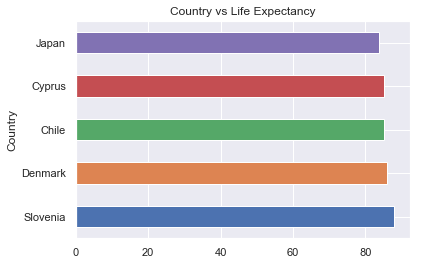

In [11]:
dc.groupby('Country')['Life expectancy '].mean().nlargest(5).plot(kind='barh')
plt.ylabel("Country")
plt.title("Country vs Life Expectancy")
plt.show()

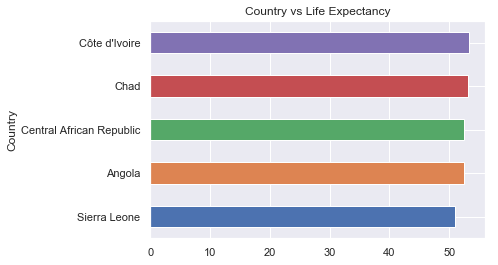

In [12]:
dc.groupby('Country')['Life expectancy '].mean().nsmallest(5).plot(kind='barh')
plt.ylabel("Country")
plt.title("Country vs Life Expectancy")
plt.show()

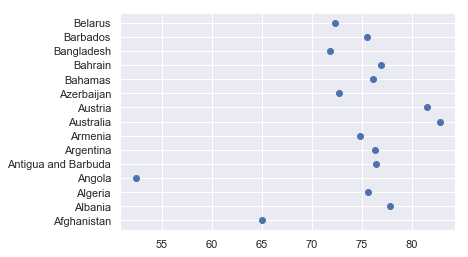

In [13]:
import matplotlib.pyplot as plt
import pandas

plt.scatter(x=dc.groupby('Country')['Life expectancy '].mean().head(15), y=dc.head(15)['Country'],c='b')
plt.show()

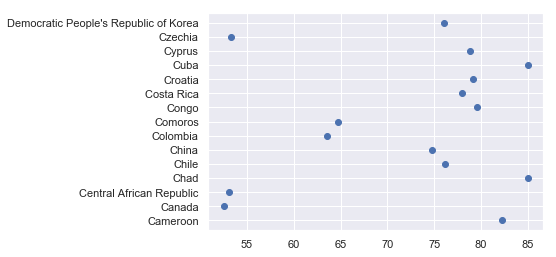

In [14]:
plt.scatter(x=dc.groupby('Country')['Life expectancy '].mean().iloc[30:45], y=dc.iloc[30:45]['Country'],c='b')
plt.show()

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime
import seaborn as sns  # a visualization library based on matplotlib

import warnings
warnings.filterwarnings('ignore')

sns.set(style="darkgrid")

%matplotlib inline

from os.path import join

filename = "Happiness_2015.csv"

df = pd.read_csv(filename)

In [16]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
1,Albania,Central and Eastern Europe,95,4.959,0.05013,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272,1.89894
2,Algeria,Middle East and Northern Africa,68,5.605,0.05099,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822,2.43209
3,Angola,Sub-Saharan Africa,137,4.033,0.04758,0.75778,0.86040,0.16683,0.10384,0.07122,0.12344,1.94939
4,Argentina,Latin America and Caribbean,30,6.574,0.04612,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451,2.83600


In [17]:
n_rows, n_columns = df.shape  
print("number of rows: {}, number of columns: {}".format(n_rows, n_columns))

number of rows: 158, number of columns: 12


In [18]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [19]:
df.isnull().sum()  

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [20]:
df.describe() 

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [21]:
top5life_expectancy = df.groupby('Country')['Happiness Rank'].max()
top5life_expectancy.head(10)

Country
Afghanistan    153
Albania         95
Algeria         68
Angola         137
Argentina       30
Armenia        127
Australia       10
Austria         13
Azerbaijan      80
Bahrain         49
Name: Happiness Rank, dtype: int64

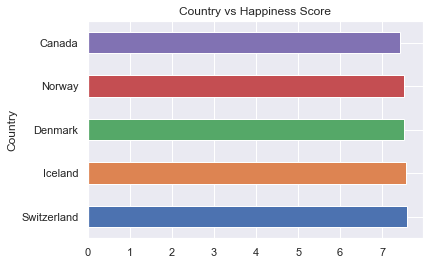

In [22]:
df.groupby('Country')['Happiness Score'].mean().nlargest().plot(kind='barh')
plt.ylabel("Country")
plt.title("Country vs Happiness Score")
plt.show()

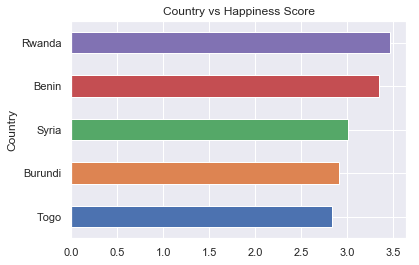

In [23]:
df.groupby('Country')['Happiness Score'].mean().nsmallest().plot(kind='barh')
plt.ylabel("Country")
plt.title("Country vs Happiness Score")
plt.show()

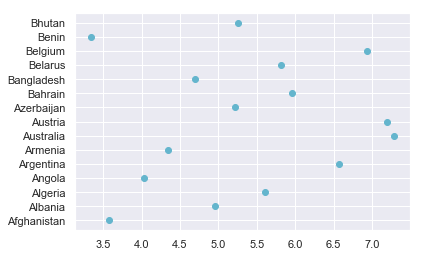

In [24]:
import matplotlib.pyplot as plt
import pandas

plt.scatter(x=df.head(15)['Happiness Score'], y=df.head(15)['Country'], c='c')
plt.show()

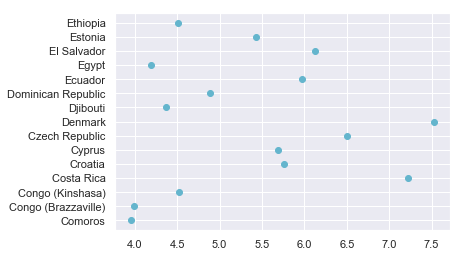

In [25]:
plt.scatter(x=df.iloc[30:45]['Happiness Score'], y=df.iloc[30:45]['Country'], c='c')
plt.show()

In [26]:
n_rows, n_columns = dc.shape  
print("number of rows: {}, number of columns: {}".format(n_rows, n_columns))

number of rows: 183, number of columns: 20


In [27]:
n_rows, n_columns = df.shape  
print("number of rows: {}, number of columns: {}".format(n_rows, n_columns))

number of rows: 158, number of columns: 12


In [28]:
x=df["Country"]  #158
y=dc["Country"]  #183

for j in range(0,158):
    for i in range(0,183):
        check = "false"
        if x[j] == y[i]:
            check = "true"
            break
    if check == "false":
        df=df[df.Country !=x[j] ]

In [29]:
df =df.reset_index(drop=True)

In [30]:
n_rows, n_columns = df.shape  
print("number of rows: {}, number of columns: {}".format(n_rows, n_columns))

number of rows: 135, number of columns: 12


In [31]:
y=df["Country"]  #135
x=dc["Country"]  #183

for j in range(0,183):
    for i in range(0,135):
        check = "false"
        if x[j] == y[i]:
            check = "true"
            break
    if check == "false":
        dc=dc[dc.Country !=x[j] ]

In [32]:
n_rows, n_columns = dc.shape  
print("number of rows: {}, number of columns: {}".format(n_rows, n_columns))

number of rows: 135, number of columns: 20


We say life expectancy is high if the country's life expectancy is greater than or equal to mean. Otherwise, we say its life expectancy is low.

In [33]:
def category(row):
    row = row["Life expectancy "]
    x = int(row)
    if x >= 69.224932 :
        return ("High")
    else :
        return ("Low")
    
dc['Rate of life expectancy'] = dc.apply(category, axis=1)
dc =dc.reset_index(drop=True)
dc.head(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Rate of life expectancy
0,Afghanistan,2015,Developing,65.0,263.0,62,71.279624,65.0,1154,19.1,...,6.0,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,Low
1,Albania,2015,Developing,77.8,74.0,0,364.975229,99.0,0,58.0,...,99.0,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,High
2,Algeria,2015,Developing,75.6,19.0,21,0.000000,95.0,63,59.5,...,95.0,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4,High
3,Angola,2015,Developing,52.4,335.0,66,0.000000,64.0,118,23.3,...,7.0,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4,Low
4,Argentina,2015,Developing,76.3,116.0,8,0.000000,94.0,0,62.8,...,93.0,94.0,0.1,13467.123600,43417765.0,1.0,0.9,0.826,17.3,High
5,Armenia,2015,Developing,74.8,118.0,1,0.000000,94.0,33,54.9,...,96.0,94.0,0.1,369.654776,291695.0,2.1,2.2,0.741,12.7,High
6,Australia,2015,Developed,82.8,59.0,1,0.000000,93.0,74,66.6,...,93.0,93.0,0.1,56554.387600,23789338.0,0.6,0.6,0.937,20.4,High
7,Austria,2015,Developed,81.5,65.0,0,0.000000,93.0,309,57.6,...,93.0,93.0,0.1,43665.947000,8633169.0,1.9,2.1,0.892,15.9,High
8,Azerbaijan,2015,Developing,72.7,118.0,5,0.000000,96.0,0,52.5,...,98.0,96.0,0.1,55.313820,9649341.0,2.8,2.9,0.758,12.7,High
9,Bahrain,2015,Developing,76.9,69.0,0,0.000000,98.0,0,63.6,...,98.0,98.0,0.1,22688.878240,NaN,6.2,6.1,0.823,14.5,High


We say happy if the country's happiness score is greater than or equal to mean. Otherwise, we say the country is unhappy.

In [34]:
def IsHappy(row):
    row = row["Happiness Score"]
    x = float(row)
    if x >= 5.375734 :
        return ("Happy")
    else :
        return ("Unhappy")
    
dc["IsHappy"] = df.apply(IsHappy, axis=1)
dc.head(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,percentage expenditure,Hepatitis B,Measles,BMI,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Rate of life expectancy,IsHappy
0,Afghanistan,2015,Developing,65.0,263.0,62,71.279624,65.0,1154,19.1,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,Low,Unhappy
1,Albania,2015,Developing,77.8,74.0,0,364.975229,99.0,0,58.0,...,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,High,Unhappy
2,Algeria,2015,Developing,75.6,19.0,21,0.000000,95.0,63,59.5,...,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4,High,Happy
3,Angola,2015,Developing,52.4,335.0,66,0.000000,64.0,118,23.3,...,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4,Low,Unhappy
4,Argentina,2015,Developing,76.3,116.0,8,0.000000,94.0,0,62.8,...,94.0,0.1,13467.123600,43417765.0,1.0,0.9,0.826,17.3,High,Happy
5,Armenia,2015,Developing,74.8,118.0,1,0.000000,94.0,33,54.9,...,94.0,0.1,369.654776,291695.0,2.1,2.2,0.741,12.7,High,Unhappy
6,Australia,2015,Developed,82.8,59.0,1,0.000000,93.0,74,66.6,...,93.0,0.1,56554.387600,23789338.0,0.6,0.6,0.937,20.4,High,Happy
7,Austria,2015,Developed,81.5,65.0,0,0.000000,93.0,309,57.6,...,93.0,0.1,43665.947000,8633169.0,1.9,2.1,0.892,15.9,High,Happy
8,Azerbaijan,2015,Developing,72.7,118.0,5,0.000000,96.0,0,52.5,...,96.0,0.1,55.313820,9649341.0,2.8,2.9,0.758,12.7,High,Unhappy
9,Bahrain,2015,Developing,76.9,69.0,0,0.000000,98.0,0,63.6,...,98.0,0.1,22688.878240,NaN,6.2,6.1,0.823,14.5,High,Happy


In [35]:
def Happiness_Score(row):
    row = row["Happiness Score"]
    x = float(row)
    return x
    
dc["Happiness_Score"] = df.apply(Happiness_Score, axis=1)
dc.head(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,percentage expenditure,Hepatitis B,Measles,BMI,...,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Rate of life expectancy,IsHappy,Happiness_Score
0,Afghanistan,2015,Developing,65.0,263.0,62,71.279624,65.0,1154,19.1,...,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,Low,Unhappy,3.575
1,Albania,2015,Developing,77.8,74.0,0,364.975229,99.0,0,58.0,...,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,High,Unhappy,4.959
2,Algeria,2015,Developing,75.6,19.0,21,0.000000,95.0,63,59.5,...,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4,High,Happy,5.605
3,Angola,2015,Developing,52.4,335.0,66,0.000000,64.0,118,23.3,...,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4,Low,Unhappy,4.033
4,Argentina,2015,Developing,76.3,116.0,8,0.000000,94.0,0,62.8,...,0.1,13467.123600,43417765.0,1.0,0.9,0.826,17.3,High,Happy,6.574
5,Armenia,2015,Developing,74.8,118.0,1,0.000000,94.0,33,54.9,...,0.1,369.654776,291695.0,2.1,2.2,0.741,12.7,High,Unhappy,4.350
6,Australia,2015,Developed,82.8,59.0,1,0.000000,93.0,74,66.6,...,0.1,56554.387600,23789338.0,0.6,0.6,0.937,20.4,High,Happy,7.284
7,Austria,2015,Developed,81.5,65.0,0,0.000000,93.0,309,57.6,...,0.1,43665.947000,8633169.0,1.9,2.1,0.892,15.9,High,Happy,7.200
8,Azerbaijan,2015,Developing,72.7,118.0,5,0.000000,96.0,0,52.5,...,0.1,55.313820,9649341.0,2.8,2.9,0.758,12.7,High,Unhappy,5.212
9,Bahrain,2015,Developing,76.9,69.0,0,0.000000,98.0,0,63.6,...,0.1,22688.878240,NaN,6.2,6.1,0.823,14.5,High,Happy,5.960


In [36]:
LE = "Life expectancy "
        
undermean = dc[dc["GDP"] <= 7483.158469][LE]
topmean = dc[dc["GDP"] > 7483.158469][LE]

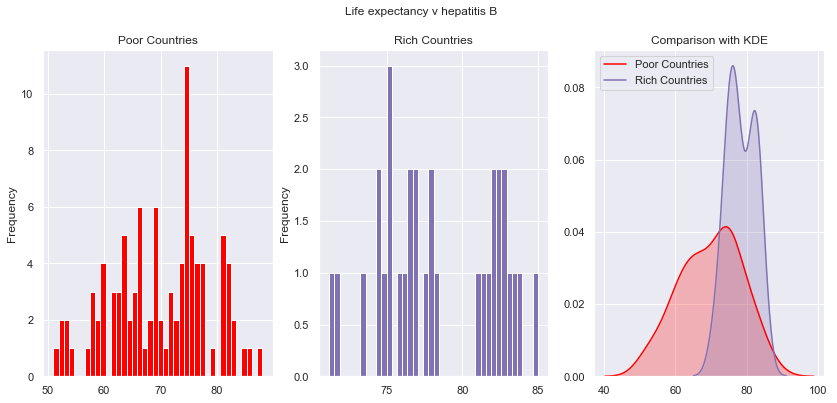

In [37]:
fig, ax = plt.subplots(1, 3, figsize=(14,6))
        
undermean.plot(kind="hist", ax=ax[0], bins=40, label="Under mean", color="red")
ax[0].set_title("Poor Countries")
topmean.plot(kind="hist", ax=ax[1], bins=40, label="Above mean", color="m")
ax[1].set_title("Rich Countries")

sns.kdeplot(undermean, shade=True, label="Poor Countries", color="red")
sns.kdeplot(topmean, shade=True, label="Rich Countries", color="m")
ax[2].set_title("Comparison with KDE")

plt.suptitle("Life expectancy v hepatitis B")
plt.show()

In [38]:
HP = "Happiness Score"
        
undermean = df[df["Freedom"] <= 0.428615][HP]
topmean = df[df["Freedom"] > 0.428615][HP]

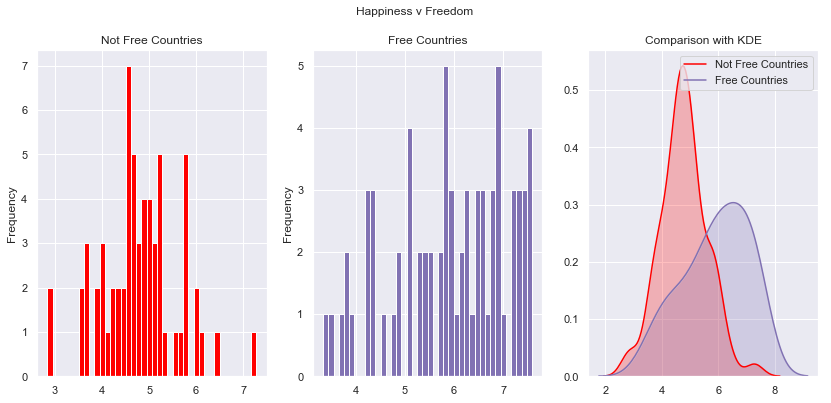

In [39]:
fig, ax = plt.subplots(1, 3, figsize=(14,6))
        
undermean.plot(kind="hist", ax=ax[0], bins=40, label="Under mean", color="red")
ax[0].set_title("Not Free Countries")
topmean.plot(kind="hist", ax=ax[1], bins=40, label="Above mean", color="m")
ax[1].set_title("Free Countries")

sns.kdeplot(undermean, shade=True, label="Not Free Countries", color="red")
sns.kdeplot(topmean, shade=True, label="Free Countries", color="m")
ax[2].set_title("Comparison with KDE")

plt.suptitle("Happiness v Freedom")
plt.show()

#### NULL HYPOTHESIS : Happiness has no effect life expectancy.

In [40]:
LE = "Life expectancy "
        
happycs = dc[dc["IsHappy"] == "Happy"][LE]
unhappycs = dc[dc["IsHappy"] == "Unhappy"][LE]

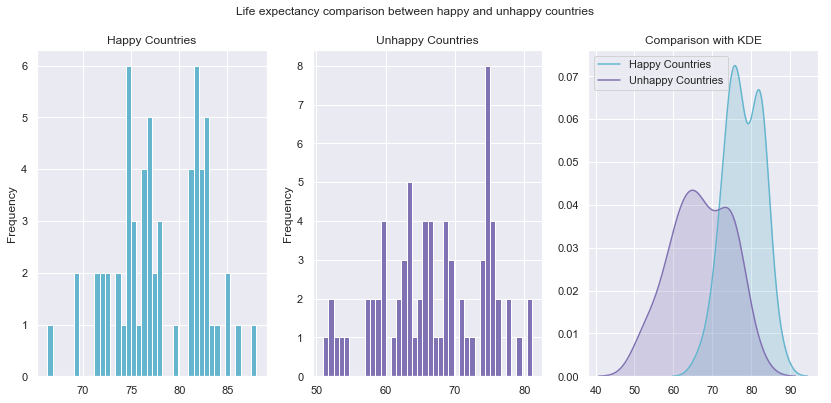

In [41]:
fig, ax = plt.subplots(1, 3, figsize=(14,6))
        
happycs.plot(kind="hist", ax=ax[0], bins=40, label="Happy Countries", color="c")
ax[0].set_title("Happy Countries")
unhappycs.plot(kind="hist", ax=ax[1], bins=40, label="Unhappy Countries", color="m")
ax[1].set_title("Unhappy Countries")

sns.kdeplot(happycs, shade=True, label="Happy Countries", color="c")
sns.kdeplot(unhappycs, shade=True, label="Unhappy Countries", color="m")
ax[2].set_title("Comparison with KDE")

plt.suptitle("Life expectancy comparison between happy and unhappy countries")
plt.show()

In [42]:
happiness = pd.crosstab(dc["Rate of life expectancy"], dc["IsHappy"])

In [43]:
happiness

IsHappy,Happy,Unhappy
Rate of life expectancy,,
High,59,26
Low,3,47


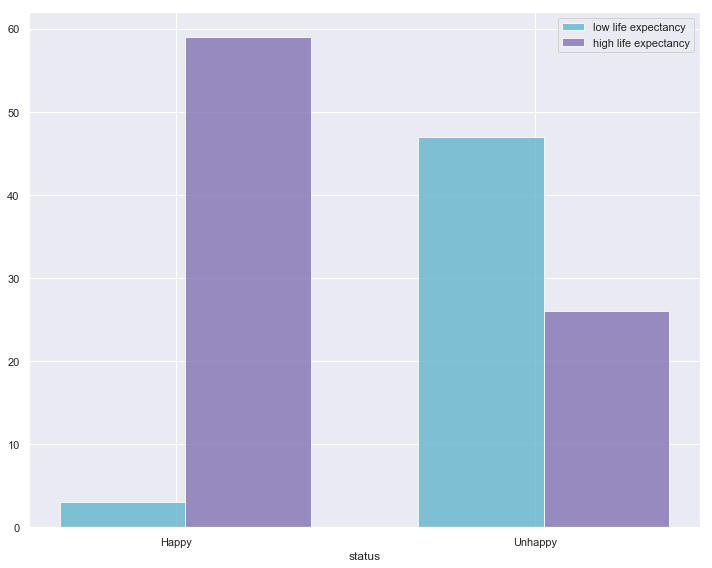

In [44]:
Low = happiness.loc["Low"]
High = happiness.loc["High"]

fig, ax = plt.subplots(1, 1, figsize=(10,8))

index = np.arange(happiness.columns.shape[0])
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, happiness.loc["Low"], bar_width,
    alpha=opacity,
    color='c',
    label='low life expectancy')
 
rects2 = plt.bar(index + bar_width, happiness.loc["High"], bar_width,
    alpha=opacity,
    color='m',
    label='high life expectancy')
 
plt.xlabel('status')
plt.xticks(index + bar_width - 0.2, happiness.columns)
plt.legend()
 
plt.tight_layout()
plt.show()

In [45]:
stats.f_oneway(happycs, unhappycs)

F_onewayResult(statistic=98.47381530690163, pvalue=1.0406514560752724e-17)

pvalue is smaller than 0.05 so we reject null hypothesis and say happiness has an effect on life expectancy.

In [46]:
from sklearn import linear_model
from sklearn import datasets
import pandas as pd
import numpy as np
lr = linear_model.LinearRegression()

In [47]:
target_labels1 = pd.DataFrame(dc, columns=["Happiness_Score"])
target_labels2 = pd.DataFrame(dc, columns=["Life expectancy "])

In [48]:
target_labels1.head()

,Happiness_Score
0,3.575
1,4.959
2,5.605
3,4.033
4,6.574


In [49]:
from sklearn.model_selection import train_test_split
 
X = target_labels1
y = target_labels2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [50]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [51]:
lr.coef_

array([[5.52793589]])

In [52]:
lr.score(X_test, y_test)

0.5029886105994512

In [53]:
from sklearn.metrics import mean_squared_error

y_predict = lr.predict(X_test)

lr_mse = mean_squared_error(y_predict, y_test)

print(lr_mse)

37.27932812547918


In [54]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

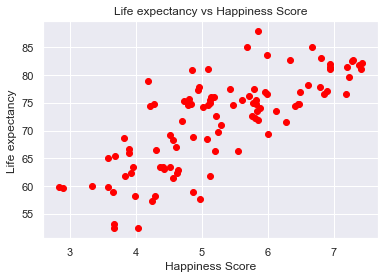

In [55]:
plt.scatter(X_train, y_train, color = 'red')
plt.title('Life expectancy vs Happiness Score')
plt.xlabel('Happiness Score')
plt.ylabel('Life expectancy ')
plt.show()

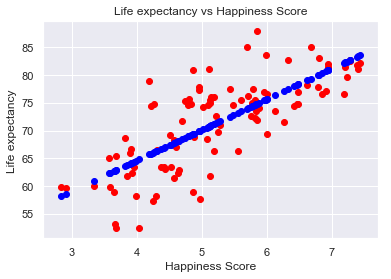

In [56]:
plt.scatter(X_train, y_train, color = 'red')
modelin_tahmin_ettigi_y = regressor.predict(X_train)
plt.scatter(X_train, modelin_tahmin_ettigi_y, color = 'blue')
plt.title('Life expectancy vs Happiness Score')
plt.xlabel('Happiness Score')
plt.ylabel('Life expectancy ')
plt.show()

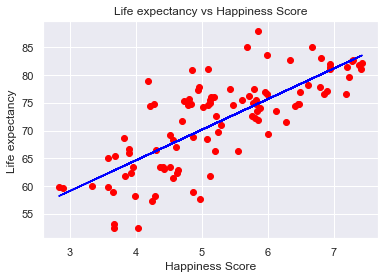

In [57]:
plt.scatter(X_train, y_train, color = 'red')
modelin_tahmin_ettigi_y = regressor.predict(X_train)
plt.plot(X_train, modelin_tahmin_ettigi_y, color = 'blue')
plt.title('Life expectancy vs Happiness Score')
plt.xlabel('Happiness Score')
plt.ylabel('Life expectancy ')
plt.show()

Blog Link : https://4horsemen147401996.wordpress.com/2019/04/28/group-project-statistical-analysis/

# Machine Learning Part

### K-Nearest Neighbor:

The intuition behind the KNN algorithm is one of the simplest of all the supervised machine learning algorithms. It simply calculates the distance of a new data point to all other training data points. It then selects the K-nearest data points, where K can be any integer. Finally, it assigns the data point to the class to which the majority of the K data points belong. You can see the figures below to visualize how k-NN works.

In [58]:
target_labels = pd.DataFrame(dc, columns=['IsHappy'])
target_labels4 = pd.DataFrame(dc, columns=['Life expectancy '])

In [59]:
target_labels['IsHappy'].unique()

array(['Unhappy', 'Happy'], dtype=object)

In [60]:
target_labels4['Life expectancy '].unique()

array([65. , 77.8, 75.6, 52.4, 76.3, 74.8, 82.8, 81.5, 72.7, 76.9, 71.8,
       72.3, 81.1, 60. , 69.8, 77.4, 65.7, 75. , 74.5, 59.9, 59.6, 68.7,
       57.3, 82.2, 52.5, 53.1, 85. , 76.1, 63.5, 79.6, 78. , 86. , 73.9,
       76.2, 79. , 73.5, 77.6, 64.8, 82.4, 66. , 74.4, 81. , 62.4, 71.9,
       59. , 74.6, 75.8, 82.7, 68.3, 69.1, 68.9, 81.4, 82.5, 83.7, 74.1,
       72. , 63.4, 74.7, 71.1, 74.9, 53.7, 61.4, 73.6, 82. , 65.5, 58.3,
       58.2, 81.7, 63.1, 76.7, 68.8, 74.3, 57.6, 66.6, 69.2, 81.9, 81.6,
       61.8, 54.5, 81.8, 76.6, 66.4, 74. , 75.5, 68.5, 77.5, 78.2, 66.1,
       66.7, 51. , 83.1, 88. , 62.9, 64.1, 71.6, 58.9, 83.4, 69.7, 71.2,
       75.3, 66.3, 62.3, 71.3, 77.1, 77. , 69.4, 67. ])

In [61]:
from sklearn.model_selection import train_test_split

X = target_labels4
y = target_labels

# 75% for training and 25% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state = 42)

In [62]:
dc.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,percentage expenditure,Hepatitis B,Measles,BMI,...,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Rate of life expectancy,IsHappy,Happiness_Score
0,Afghanistan,2015,Developing,65.0,263.0,62,71.279624,65.0,1154,19.1,...,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,Low,Unhappy,3.575
1,Albania,2015,Developing,77.8,74.0,0,364.975229,99.0,0,58.0,...,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,High,Unhappy,4.959
2,Algeria,2015,Developing,75.6,19.0,21,0.000000,95.0,63,59.5,...,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4,High,Happy,5.605
3,Angola,2015,Developing,52.4,335.0,66,0.000000,64.0,118,23.3,...,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4,Low,Unhappy,4.033
4,Argentina,2015,Developing,76.3,116.0,8,0.000000,94.0,0,62.8,...,0.1,13467.123600,43417765.0,1.0,0.9,0.826,17.3,High,Happy,6.574


In [63]:
from sklearn.neighbors import KNeighborsClassifier

# Let's try with k = 5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [64]:
y_pred = knn.predict(X_test)

In [65]:
from sklearn import metrics

print("Accuracy of the model with k = 5 :",metrics.accuracy_score(y_test, y_pred))

Accuracy of the model with k = 5 : 0.6764705882352942


In [66]:
from sklearn import metrics

knn_10 = KNeighborsClassifier(n_neighbors=10)
knn_10.fit(X_train, y_train)

y_pred_10 = knn_10.predict(X_test)
print("Accuracy of the model with k = 10 :",metrics.accuracy_score(y_test, y_pred_10))

Accuracy of the model with k = 10 : 0.6470588235294118


In [67]:
accuracy_list = []
for k in range (1, 25):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_list.append(metrics.accuracy_score(y_test, y_pred))

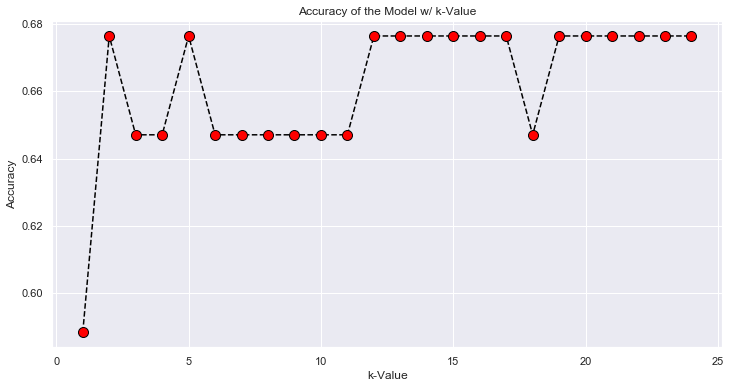

In [68]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 25), accuracy_list, color='black', linestyle='dashed', marker='o',  
         markerfacecolor='red', markersize=10)
plt.title('Accuracy of the Model w/ k-Value')  
plt.xlabel('k-Value')  
plt.ylabel('Accuracy') 
plt.show()

In [69]:
normalized_dc = (target_labels4-target_labels4.mean()) / target_labels4.std()

In [70]:
normalized_dc.head()

,Life expectancy
0,-0.843763
1,0.682802
2,0.420424
3,-2.346476
4,0.503908


In [71]:
X_norm = normalized_dc
y = target_labels

# 75% for training and 25% for testing
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size= 0.25, random_state = 42)

In [72]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Accuracy of the model with k = 5 and using normalized features: ",metrics.accuracy_score(y_test, y_pred))

Accuracy of the model with k = 5 and using normalized features:  0.6764705882352942


In [73]:
accuracy_list_norm = []
for k in range (1, 25):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_list_norm.append(metrics.accuracy_score(y_test, y_pred))

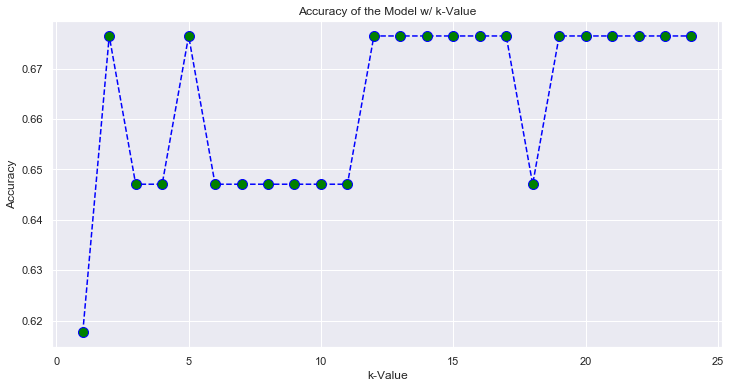

In [74]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 25), accuracy_list_norm, color='blue', linestyle='dashed', marker='o',  
         markerfacecolor='green', markersize=10)
plt.title('Accuracy of the Model w/ k-Value')  
plt.xlabel('k-Value')  
plt.ylabel('Accuracy') 
plt.show()

In [75]:
target_labels5 = pd.DataFrame(dc, columns=['Rate of life expectancy'])
target_labels6 = pd.DataFrame(dc, columns=['Happiness_Score'])

In [76]:
target_labels5['Rate of life expectancy'].unique()

array(['Low', 'High'], dtype=object)

In [77]:
target_labels6['Happiness_Score'].unique()

array([3.575, 4.959, 5.605, 4.033, 6.574, 4.35 , 7.284, 7.2  , 5.212,
       5.96 , 4.694, 5.813, 6.937, 3.34 , 5.253, 4.949, 4.332, 6.983,
       4.218, 3.587, 2.905, 3.819, 4.252, 7.427, 3.678, 3.667, 6.67 ,
       5.14 , 6.477, 3.956, 7.226, 5.759, 5.689, 7.527, 4.369, 4.885,
       5.975, 4.194, 6.13 , 5.429, 4.512, 7.406, 6.575, 3.896, 4.297,
       6.75 , 4.633, 4.857, 6.123, 3.656, 4.518, 4.788, 4.8  , 7.561,
       4.565, 5.399, 4.677, 6.94 , 7.278, 5.948, 5.709, 5.987, 5.192,
       5.855, 4.419, 6.295, 5.286, 5.098, 4.839, 4.898, 4.571, 5.754,
       5.833, 6.946, 3.681, 4.292, 5.77 , 3.995, 6.302, 4.436, 5.477,
       7.187, 4.874, 5.013, 4.971, 4.307, 4.514, 7.378, 7.286, 5.828,
       3.845, 5.268, 7.522, 6.853, 5.194, 6.786, 5.878, 5.824, 5.073,
       5.791, 5.102, 6.611, 5.124, 3.465, 6.411, 3.904, 5.123, 4.507,
       6.798, 5.995, 5.848, 4.642, 6.329, 4.271, 4.55 , 6.269, 4.867,
       7.364, 7.587, 4.786, 6.455, 2.839, 6.168, 4.739, 5.332, 5.548,
       3.931, 4.681,

In [78]:
dc.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,percentage expenditure,Hepatitis B,Measles,BMI,...,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Rate of life expectancy,IsHappy,Happiness_Score
0,Afghanistan,2015,Developing,65.0,263.0,62,71.279624,65.0,1154,19.1,...,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,Low,Unhappy,3.575
1,Albania,2015,Developing,77.8,74.0,0,364.975229,99.0,0,58.0,...,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,High,Unhappy,4.959
2,Algeria,2015,Developing,75.6,19.0,21,0.000000,95.0,63,59.5,...,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4,High,Happy,5.605
3,Angola,2015,Developing,52.4,335.0,66,0.000000,64.0,118,23.3,...,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4,Low,Unhappy,4.033
4,Argentina,2015,Developing,76.3,116.0,8,0.000000,94.0,0,62.8,...,0.1,13467.123600,43417765.0,1.0,0.9,0.826,17.3,High,Happy,6.574


In [79]:
from sklearn.model_selection import train_test_split

X = target_labels6
y = target_labels5

# 75% for training and 25% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state = 42)

In [80]:
from sklearn.neighbors import KNeighborsClassifier

# Let's try with k = 5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [81]:
y_pred = knn.predict(X_test)

In [82]:
from sklearn import metrics

print("Accuracy of the model with k = 5 :",metrics.accuracy_score(y_test, y_pred))

Accuracy of the model with k = 5 : 0.7647058823529411


In [83]:
from sklearn import metrics

knn_10 = KNeighborsClassifier(n_neighbors=10)
knn_10.fit(X_train, y_train)

y_pred_10 = knn_10.predict(X_test)
print("Accuracy of the model with k = 10 :",metrics.accuracy_score(y_test, y_pred_10))

Accuracy of the model with k = 10 : 0.8529411764705882


In [84]:
accuracy_list = []
for k in range (1, 25):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_list.append(metrics.accuracy_score(y_test, y_pred))

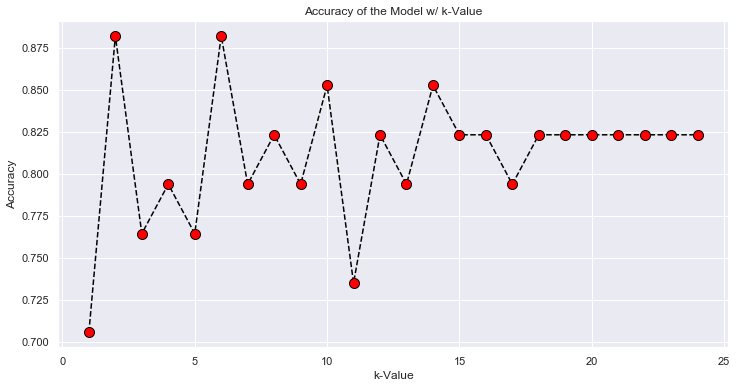

In [85]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 25), accuracy_list, color='black', linestyle='dashed', marker='o',  
         markerfacecolor='red', markersize=10)
plt.title('Accuracy of the Model w/ k-Value')  
plt.xlabel('k-Value')  
plt.ylabel('Accuracy') 
plt.show()

In [86]:
normalized_dc = (target_labels6-target_labels6.mean()) / target_labels6.std()

In [87]:
normalized_dc.head()

,Happiness_Score
0,-1.560967
1,-0.366928
2,0.190405
3,-1.165830
4,1.026404


In [88]:
X_norm = normalized_dc
y = target_labels5

# 75% for training and 25% for testing
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size= 0.25, random_state = 42)

In [89]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Accuracy of the model with k = 5 and using normalized features: ",metrics.accuracy_score(y_test, y_pred))

Accuracy of the model with k = 5 and using normalized features:  0.7647058823529411


In [90]:
accuracy_list_norm = []
for k in range (1, 25):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_list_norm.append(metrics.accuracy_score(y_test, y_pred))

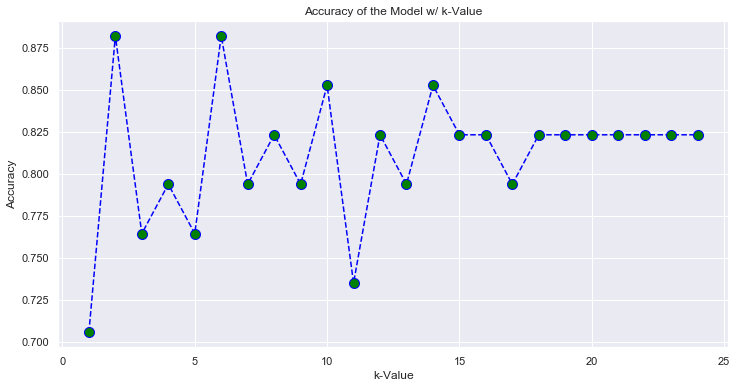

In [91]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 25), accuracy_list_norm, color='blue', linestyle='dashed', marker='o',  
         markerfacecolor='green', markersize=10)
plt.title('Accuracy of the Model w/ k-Value')  
plt.xlabel('k-Value')  
plt.ylabel('Accuracy') 
plt.show()

### Decision Trees:

Decision trees are supervised Machine Learning algorithms which can be used for both classification and regression problems. Goal of using these algorithm to create a model – which is a tree – that predicts the value of a target variable by learning simple decision rules inferred from the data features.

In [92]:
dc = dc.drop(['Country'], axis = 1)
dc = dc.drop(['Status'], axis = 1)

In [93]:
dc.head()

,Year,Life expectancy,Adult Mortality,infant deaths,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Rate of life expectancy,IsHappy,Happiness_Score
0,2015,65.0,263.0,62,71.279624,65.0,1154,19.1,83,6.0,...,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,Low,Unhappy,3.575
1,2015,77.8,74.0,0,364.975229,99.0,0,58.0,0,99.0,...,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,High,Unhappy,4.959
2,2015,75.6,19.0,21,0.000000,95.0,63,59.5,24,95.0,...,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4,High,Happy,5.605
3,2015,52.4,335.0,66,0.000000,64.0,118,23.3,98,7.0,...,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4,Low,Unhappy,4.033
4,2015,76.3,116.0,8,0.000000,94.0,0,62.8,9,93.0,...,0.1,13467.123600,43417765.0,1.0,0.9,0.826,17.3,High,Happy,6.574


In [94]:
target_labels7 = pd.DataFrame(dc, columns=['Rate of life expectancy'])
target_labels8 = pd.DataFrame(dc, columns=['Happiness_Score'])

In [95]:
X = target_labels8
y = target_labels7 

In [96]:
from sklearn.model_selection import train_test_split

# This will create us train and test datasets from the original dataset that we have where
# 70% of original dataframe will be train set and 30% of it will be test set to evaluate the Decision Tree
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.30)

In [97]:
from sklearn import tree

model = tree.DecisionTreeClassifier()

In [98]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

With the model I have set up, I look at the score of the "test" data I have allocated above. The output is as a confusion matrix.


In [99]:
y_predict = model.predict(X_test)

In [100]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.7804878048780488

Well, we got a classification rate of 78.04%, considered as good accuracy

In [101]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)

array([[26,  6],
       [ 3,  6]], dtype=int64)

In [102]:
pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Predicted Unhappy Countries', 'Predicted Happy Countries'],
    index=['True Unhappy Countries', 'True Happy Countries'])

,Predicted Unhappy Countries,Predicted Happy Countries
True Unhappy Countries,26,6
True Happy Countries,3,6


In [103]:
df = dc.drop(['Rate of life expectancy', 'IsHappy'], axis = 1)

In [104]:
df.fillna(method= 'ffill').astype(int)

,Year,Life expectancy,Adult Mortality,infant deaths,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Happiness_Score
0,2015,65,263,62,71,65,1154,19,83,6,65,0,584,33736494,17,17,0,10,3
1,2015,77,74,0,364,99,0,58,0,99,99,0,3954,28873,1,1,0,14,4
2,2015,75,19,21,0,95,63,59,24,95,95,0,4132,39871528,6,5,0,14,5
3,2015,52,335,66,0,64,118,23,98,7,64,1,3695,2785935,8,8,0,11,4
4,2015,76,116,8,0,94,0,62,9,93,94,0,13467,43417765,1,0,0,17,6
5,2015,74,118,1,0,94,33,54,1,96,94,0,369,291695,2,2,0,12,4
6,2015,82,59,1,0,93,74,66,1,93,93,0,56554,23789338,0,0,0,20,7
7,2015,81,65,0,0,93,309,57,0,93,93,0,43665,8633169,1,2,0,15,7
8,2015,72,118,5,0,96,0,52,6,98,96,0,55,9649341,2,2,0,12,5
9,2015,76,69,0,0,98,0,63,0,98,98,0,22688,9649341,6,6,0,14,5


In [105]:
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler

In [108]:
imp = Imputer(missing_values='NaN', strategy='median', axis=0)

C:\Users\DeLL\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


LR: 0.769515 (0.048411)
LDA: 0.773462 (0.051592)
KNN: 0.726555 (0.061821)
CART: 0.691302 (0.056953)
NB: 0.755178 (0.042766)
SVM: 0.651025 (0.072141)


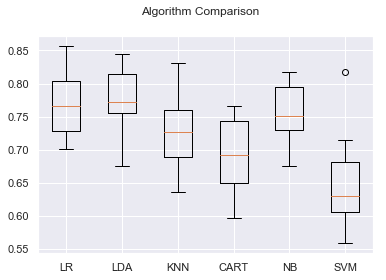

In [107]:
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

From these results, it would suggest that both logistic regression and linear discriminate analysis are perhaps worthy of further study on this problem.